In [1]:
import pandas as pd

# 데이터 로드
train_df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

print("훈련 데이터셋 미리보기:")
print(train_df.head())
print("\n테스트 데이터셋 미리보기:")
print(test_df.head())

훈련 데이터셋 미리보기:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   200

In [2]:
print("\n훈련 데이터셋 정보:")
train_df.info()
print("\n테스트 데이터셋 정보:")
test_df.info()

print("\n훈련 데이터셋 결측치 상위 20개:")
print(train_df.isnull().sum().sort_values(ascending=False).head(20))
print("\n테스트 데이터셋 결측치 상위 20개:")
print(test_df.isnull().sum().sort_values(ascending=False).head(20))


훈련 데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  


In [3]:
print("\n훈련 데이터셋 기술 통계량 (일부):")
print(train_df.describe().T) # 전치하여 가독성 높임
print("\n테스트 데이터셋 기술 통계량 (일부):")
print(test_df.describe().T)


훈련 데이터셋 기술 통계량 (일부):
                count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1

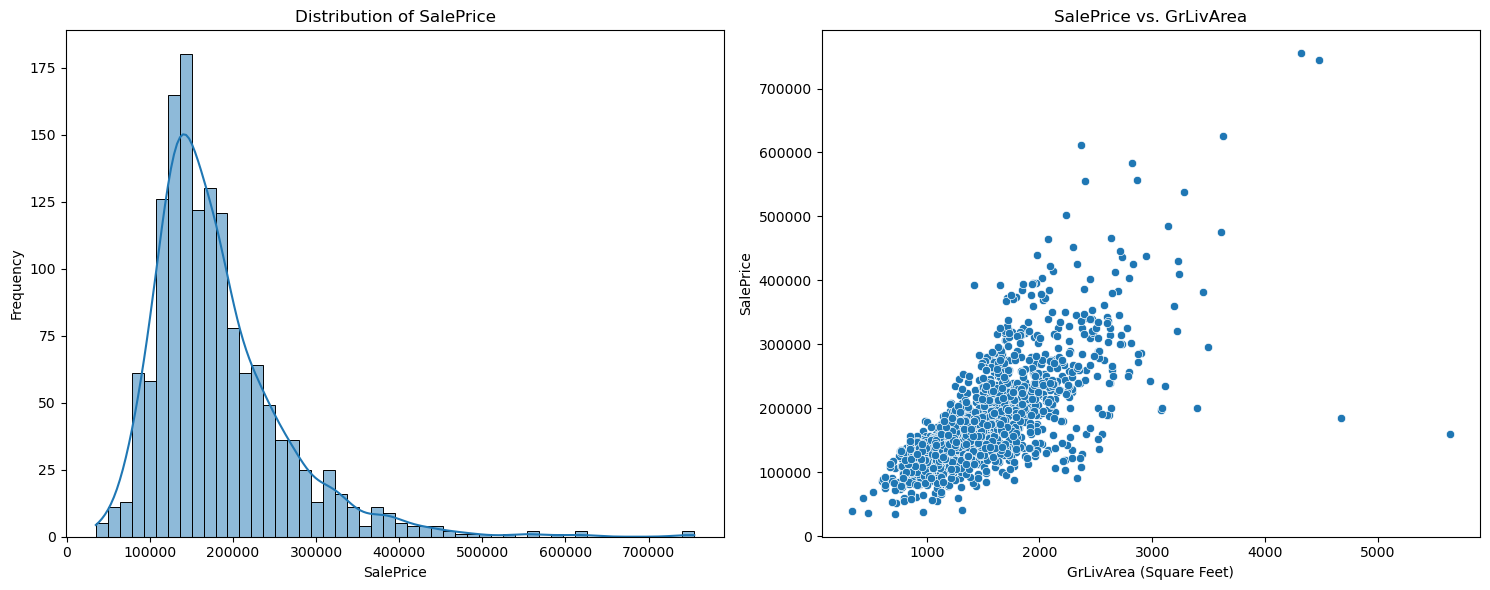

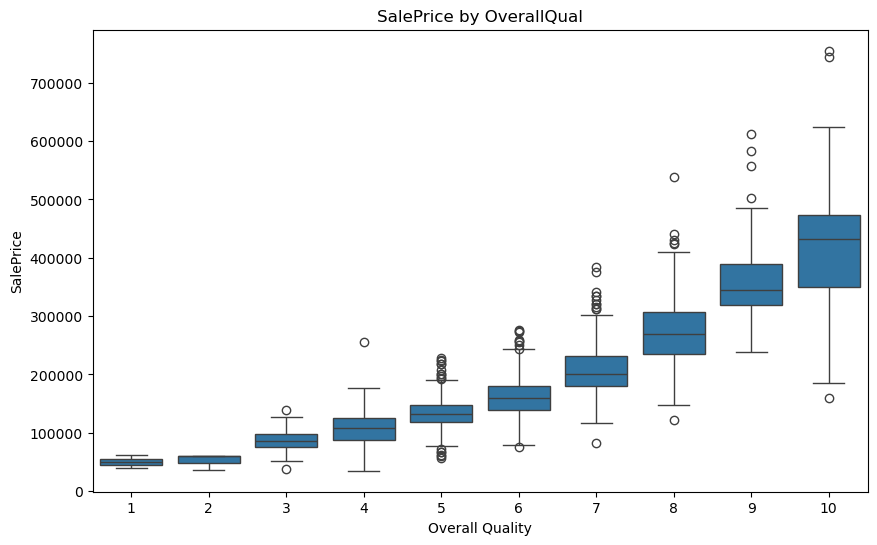

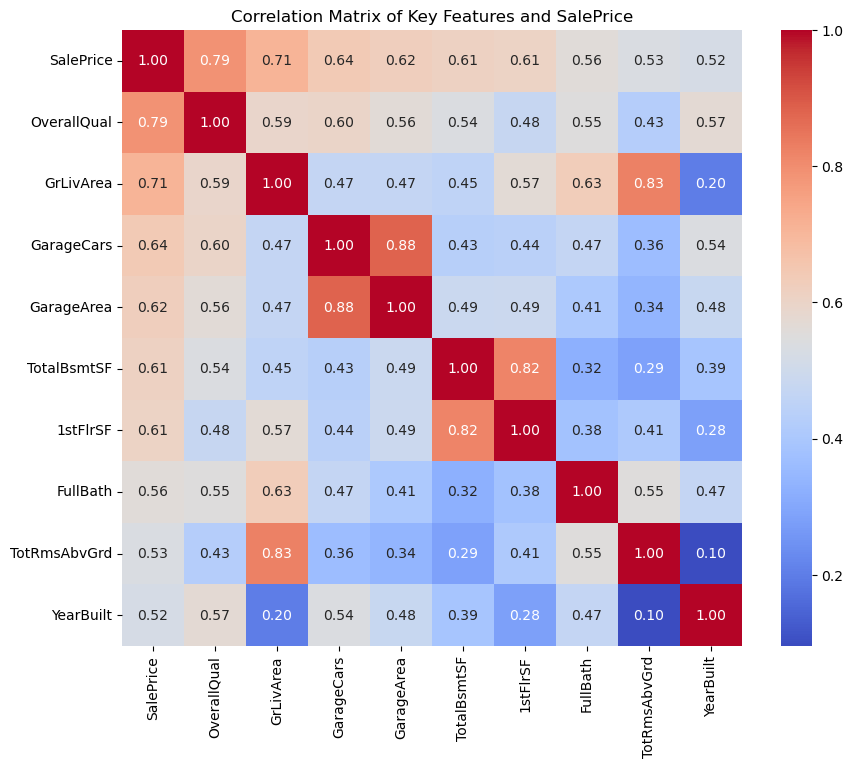

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))

# SalePrice 분포
plt.subplot(1, 2, 1)
sns.histplot(train_df['SalePrice'], kde=True, bins=50)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')

# SalePrice와 GrLivArea(지상 거실 면적) 관계
plt.subplot(1, 2, 2)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df)
plt.title('SalePrice vs. GrLivArea')
plt.xlabel('GrLivArea (Square Feet)')
plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

# OverallQual(전반적인 재료 및 마감 품질)과 SalePrice 관계 (범주형 특성)
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)
plt.title('SalePrice by OverallQual')
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice')
plt.show()

# 상관 관계 히트맵 (일부 수치형 특성)
# 상관관계가 높은 특성들을 먼저 선택하여 시각화하면 좋습니다.
corr_matrix = train_df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Features and SalePrice')
plt.show()

In [5]:
# 모든 데이터를 합쳐서 전처리 (훈련/테스트 데이터의 일관성 유지)
all_data = pd.concat((train_df.drop('SalePrice', axis=1), test_df), axis=0)

# Id 컬럼은 제출 시에만 필요하므로 따로 저장 후 제거
train_id = train_df['Id']
test_id = test_df['Id']
all_data = all_data.drop('Id', axis=1)

# 결측치 비율 확인 (임계값 설정)
total_missing = all_data.isnull().sum().sort_values(ascending=False)
percent_missing = (all_data.isnull().sum() / len(all_data) * 100).sort_values(ascending=False)
missing_data = pd.DataFrame({'Total Missing': total_missing, '% Missing': percent_missing})
print("\n전체 데이터셋 결측치 비율 (상위):")
print(missing_data.head(20))

# 1. 결측치 비율이 높은 컬럼 처리 (50% 이상)
# PoolQC, MiscFeature, Alley, Fence, FireplaceQu 등은 NaN이 '없음'을 의미하거나 너무 많으므로 특정 값으로 대체
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'MasVnrType'):
    all_data[col] = all_data[col].fillna('None')

# 2. 수치형이지만 '없음'의 의미를 가지는 0으로 대체하는 컬럼
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'):
    all_data[col] = all_data[col].fillna(0)

# 3. 평균/중앙값 대체 (Age, LotFrontage 등)
# LotFrontage: 해당 지역의 평균 LotFrontage로 대체 (Neighborhood별 중앙값 사용)
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
# Age와 관련된 YearBuilt, YearRemodAdd, MoSold 등은 시계열 데이터이므로 다른 전략 고려 가능
# 여기서는 간단히 최빈값으로 대체
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['Functional'] = all_data['Functional'].fillna(all_data['Functional'].mode()[0])

# 4. Utilities 컬럼 제거 (대부분 동일 값, 분산 없음)
all_data = all_data.drop(['Utilities'], axis=1)

# 모든 결측치 처리 확인
print("\n결측치 처리 후:")
print(all_data.isnull().sum().sum()) # 0이 나와야 함


전체 데이터셋 결측치 비율 (상위):
              Total Missing  % Missing
PoolQC                 2909  99.657417
MiscFeature            2814  96.402878
Alley                  2721  93.216855
Fence                  2348  80.438506
MasVnrType             1766  60.500171
FireplaceQu            1420  48.646797
LotFrontage             486  16.649538
GarageYrBlt             159   5.447071
GarageFinish            159   5.447071
GarageQual              159   5.447071
GarageCond              159   5.447071
GarageType              157   5.378554
BsmtExposure             82   2.809181
BsmtCond                 82   2.809181
BsmtQual                 81   2.774923
BsmtFinType2             80   2.740665
BsmtFinType1             79   2.706406
MasVnrArea               23   0.787941
MSZoning                  4   0.137033
BsmtHalfBath              2   0.068517

결측치 처리 후:
0


In [6]:
# 숫자형으로 인식될 수 있는 범주형 컬럼들을 object 타입으로 변경
for col in ['MSSubClass', 'OverallQual', 'OverallCond']:
    all_data[col] = all_data[col].astype(str)

# One-Hot Encoding (명목형 범주)
# GarageType, MasVnrType, Neighborhood, SaleCondition 등
all_data = pd.get_dummies(all_data)

print("\nOne-Hot Encoding 후 데이터 크기:", all_data.shape)


One-Hot Encoding 후 데이터 크기: (2919, 332)


In [7]:
# SalePrice의 로그 변환 (훈련 데이터만)
# np.log1p는 log(1+x)로, 0을 처리할 수 있어 편리합니다.
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

# 로그 변환 후 분포 확인
plt.figure(figsize=(7, 5))
sns.histplot(train_df['SalePrice'], kde=True, bins=50)
plt.title('Distribution of Log-Transformed SalePrice')
plt.xlabel('Log(SalePrice)')
plt.ylabel('Frequency')
plt.show()

# 왜곡된 수치형 특성 찾기 및 로그 변환 (선택 사항, 고급)
# skewness = all_data.skew()
# skewed_features = skewness[skewness > 0.75].index
# all_data[skewed_features] = np.log1p(all_data[skewed_features])

NameError: name 'np' is not defined

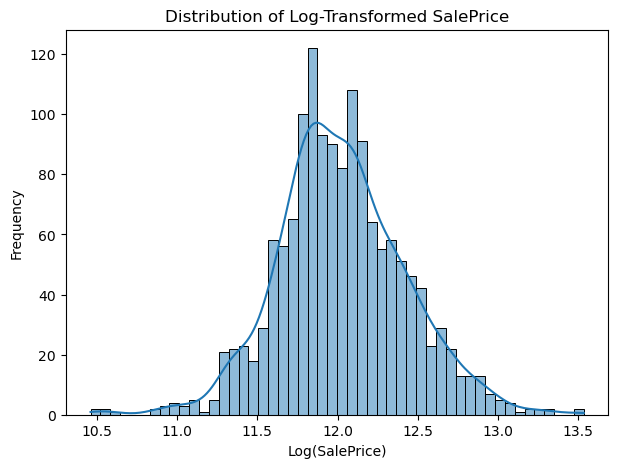

In [8]:
# 3. 수치형 특성 변환 (Numerical Feature Transformation):
# 타겟 변수인 `SalePrice`가 왜곡된 분포를 가지고 있다면, 모델의 예측 성능을 높이기 위해 로그 변환을 수행합니다.
# 입력 특성들도 왜곡이 심하다면 로그 변환이나 박스-콕스 변환 등을 고려할 수 있습니다.

import numpy as np # <-- 이 줄을 추가합니다.

# SalePrice의 로그 변환 (훈련 데이터만)
# np.log1p는 log(1+x)로, 0을 처리할 수 있어 편리합니다.
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

# 로그 변환 후 분포 확인
plt.figure(figsize=(7, 5))
sns.histplot(train_df['SalePrice'], kde=True, bins=50)
plt.title('Distribution of Log-Transformed SalePrice')
plt.xlabel('Log(SalePrice)')
plt.ylabel('Frequency')
plt.show()

# 왜곡된 수치형 특성 찾기 및 로그 변환 (선택 사항, 고급)
# skewness = all_data.skew()
# skewed_features = skewness[skewness > 0.75].index
# all_data[skewed_features] = np.log1p(all_data[skewed_features])

In [9]:
# 4단계: 모델 학습 및 예측

import numpy as np # <-- 이 줄을 추가합니다.
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# XGBoost 모델 초기화 (기본 하이퍼파라미터)
# objective='reg:squarederror': 회귀 문제, 오차 제곱 최소화
# n_estimators: 부스팅 라운드 수
# random_state: 재현성
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             n_estimators=1000, # 충분히 많은 트리
                             learning_rate=0.05, # 학습률
                             random_state=42,
                             n_jobs=-1) # 모든 코어 사용

# K-Fold 교차 검증을 통한 모델 학습 및 평가
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []
oof_predictions = np.zeros(X_train.shape[0]) # Out-of-Fold 예측 저장

print("\nXGBoost K-Fold Cross-Validation 시작...")
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"\n--- Fold {fold+1} ---")
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    xgb_model.fit(X_train_fold, y_train_fold,
                  early_stopping_rounds=50, # 50라운드 동안 성능 개선 없으면 조기 종료
                  eval_set=[(X_val_fold, y_val_fold)],
                  verbose=False) # 학습 과정 메시지 비활성화

    val_preds = xgb_model.predict(X_val_fold)
    oof_predictions[val_index] = val_preds # Out-of-Fold 예측 저장

    # RMSE 계산 (원래 스케일로 역변환하여 계산)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_val_fold), np.expm1(val_preds)))
    rmse_scores.append(rmse)
    print(f"Fold {fold+1} RMSE: {rmse:.4f}")

print("\n--- XGBoost K-Fold Cross-Validation 최종 결과 ---")
print(f"평균 RMSE: {np.mean(rmse_scores):.4f} (+/- {np.std(rmse_scores):.4f})")

# 3. 최종 테스트 데이터 예측 및 제출 파일 생성:
# 모든 훈련 데이터로 최종 모델 재학습 (선택 사항이지만 성능 향상에 도움)
# 또는 K-Fold에서 가장 좋았던 모델 사용, 여기서는 간단히 최종 xgb_model 사용
# 일반적으로 GridSearchCV의 best_estimator_를 사용하거나, OOF 예측을 통해 앙상블함

# 테스트 데이터셋에 대한 예측 수행 (로그 스케일)
test_predictions_log = xgb_model.predict(X_test)

# 원래 가격 스케일로 역변환
final_predictions_price = np.expm1(test_predictions_log)

# 제출 파일 생성
submission_df_hp = pd.DataFrame({'Id': test_id, 'SalePrice': final_predictions_price})
submission_df_hp.to_csv('submission_house_prices.csv', index=False)

print("\n최종 제출 파일 'submission_house_prices.csv'가 생성되었습니다.")
print(submission_df_hp.head())

NameError: name 'X_train' is not defined

In [10]:
# 3단계: 데이터 전처리 (Feature Engineering & Preprocessing)의 마지막 부분

# --- (이전 전처리 코드들이 모두 실행되어 all_data가 준비되어 있다고 가정) ---

# 훈련 데이터셋 크기 (로그 변환된 SalePrice를 가진 train_df의 원래 행 수)
n_train = train_df.shape[0]

# 전처리된 all_data에서 훈련/테스트셋 분리
X_train = all_data[:n_train] # <-- 이 부분에서 X_train이 정의됩니다.
X_test = all_data[n_train:]
y_train = train_df['SalePrice'] # 로그 변환된 SalePrice

print(f"\n최종 X_train shape: {X_train.shape}")
print(f"최종 y_train shape: {y_train.shape}")
print(f"최종 X_test shape: {X_test.shape}")


최종 X_train shape: (1460, 332)
최종 y_train shape: (1460,)
최종 X_test shape: (1459, 332)


In [11]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# XGBoost 모델 초기화 (기본 하이퍼파라미터)
# objective='reg:squarederror': 회귀 문제, 오차 제곱 최소화
# n_estimators: 부스팅 라운드 수
# random_state: 재현성
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             n_estimators=1000, # 충분히 많은 트리
                             learning_rate=0.05, # 학습률
                             random_state=42,
                             n_jobs=-1) # 모든 코어 사용

# K-Fold 교차 검증을 통한 모델 학습 및 평가
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []
oof_predictions = np.zeros(X_train.shape[0]) # Out-of-Fold 예측 저장

print("\nXGBoost K-Fold Cross-Validation 시작...")
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"\n--- Fold {fold+1} ---")
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    xgb_model.fit(X_train_fold, y_train_fold,
                  early_stopping_rounds=50, # 50라운드 동안 성능 개선 없으면 조기 종료
                  eval_set=[(X_val_fold, y_val_fold)],
                  verbose=False) # 학습 과정 메시지 비활성화

    val_preds = xgb_model.predict(X_val_fold)
    oof_predictions[val_index] = val_preds # Out-of-Fold 예측 저장

    # RMSE 계산 (원래 스케일로 역변환하여 계산)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_val_fold), np.expm1(val_preds)))
    rmse_scores.append(rmse)
    print(f"Fold {fold+1} RMSE: {rmse:.4f}")

print("\n--- XGBoost K-Fold Cross-Validation 최종 결과 ---")
print(f"평균 RMSE: {np.mean(rmse_scores):.4f} (+/- {np.std(rmse_scores):.4f})")


XGBoost K-Fold Cross-Validation 시작...

--- Fold 1 ---


TypeError: fit() got an unexpected keyword argument 'early_stopping_rounds'

In [12]:
# 훈련 데이터셋 크기
n_train = train_df.shape[0]

# 전처리된 데이터에서 훈련/테스트셋 분리
X_train = all_data[:n_train]
X_test = all_data[n_train:]
y_train = train_df['SalePrice'] # 로그 변환된 SalePrice

In [13]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# XGBoost 모델 초기화 (기본 하이퍼파라미터)
# objective='reg:squarederror': 회귀 문제, 오차 제곱 최소화
# n_estimators: 부스팅 라운드 수
# random_state: 재현성
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             n_estimators=1000, # 충분히 많은 트리
                             learning_rate=0.05, # 학습률
                             random_state=42,
                             n_jobs=-1) # 모든 코어 사용

# K-Fold 교차 검증을 통한 모델 학습 및 평가
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []
oof_predictions = np.zeros(X_train.shape[0]) # Out-of-Fold 예측 저장

print("\nXGBoost K-Fold Cross-Validation 시작...")
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"\n--- Fold {fold+1} ---")
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    xgb_model.fit(X_train_fold, y_train_fold,
                  early_stopping_rounds=50, # 50라운드 동안 성능 개선 없으면 조기 종료
                  eval_set=[(X_val_fold, y_val_fold)],
                  verbose=False) # 학습 과정 메시지 비활성화

    val_preds = xgb_model.predict(X_val_fold)
    oof_predictions[val_index] = val_preds # Out-of-Fold 예측 저장

    # RMSE 계산 (원래 스케일로 역변환하여 계산)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_val_fold), np.expm1(val_preds)))
    rmse_scores.append(rmse)
    print(f"Fold {fold+1} RMSE: {rmse:.4f}")

print("\n--- XGBoost K-Fold Cross-Validation 최종 결과 ---")
print(f"평균 RMSE: {np.mean(rmse_scores):.4f} (+/- {np.std(rmse_scores):.4f})")


XGBoost K-Fold Cross-Validation 시작...

--- Fold 1 ---


TypeError: fit() got an unexpected keyword argument 'early_stopping_rounds'

In [14]:
# 4단계: 모델 학습 및 예측

import numpy as np
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# 필요한 콜백 모듈 임포트
from xgboost.callback import EarlyStopping # <-- 이 줄을 추가합니다.

# XGBoost 모델 초기화
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             n_estimators=1000,
                             learning_rate=0.05,
                             random_state=42,
                             n_jobs=-1)

# K-Fold 교차 검증을 통한 모델 학습 및 평가
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []
oof_predictions = np.zeros(X_train.shape[0]) # Out-of-Fold 예측 저장

print("\nXGBoost K-Fold Cross-Validation 시작...")
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"\n--- Fold {fold+1} ---")
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # EarlyStopping 콜백 정의
    # monitor: 모니터링할 지표 ('validation_0-rmse'는 첫 번째 eval_set의 RMSE)
    # patience: 성능 개선 없이 얼마나 기다릴지
    # best_score: 가장 좋은 점수를 기준으로 조기 종료할지 (False면 마지막 점수)
    # verbose: 조기 종료 메시지 출력 여부
    early_stopping_callback = EarlyStopping(
        rounds=50,                  # early_stopping_rounds 대신 rounds
        save_best=True,             # 최적의 모델 상태를 저장
        maximize=False,             # RMSE는 작을수록 좋으므로 False
        data_name="validation_0",   # eval_set의 첫 번째 데이터셋
        metric_name="rmse"          # 모니터링할 지표 (objective='reg:squarederror'일 때 기본)
    )

    xgb_model.fit(X_train_fold, y_train_fold,
                  eval_set=[(X_val_fold, y_val_fold)],
                  callbacks=[early_stopping_callback], # <-- callbacks 인자로 전달합니다.
                  verbose=False) # 학습 과정 메시지 비활성화

    # best_iteration 또는 best_ntree_limit를 사용하여 최적의 모델로 예측
    # save_best=True일 경우, 모델은 자동으로 최적의 상태로 복원됩니다.
    val_preds = xgb_model.predict(X_val_fold)
    oof_predictions[val_index] = val_preds

    # RMSE 계산 (원래 스케일로 역변환하여 계산)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_val_fold), np.expm1(val_preds)))
    rmse_scores.append(rmse)
    print(f"Fold {fold+1} RMSE: {rmse:.4f}")

print("\n--- XGBoost K-Fold Cross-Validation 최종 결과 ---")
print(f"평균 RMSE: {np.mean(rmse_scores):.4f} (+/- {np.std(rmse_scores):.4f})")


# 3. 최종 테스트 데이터 예측 및 제출 파일 생성:
# 이 부분은 변경 없음 (best_xgb_model을 사용하거나, K-Fold 마지막 모델 사용)
# 만약 GridSearchCV를 사용했다면 best_xgb_model = grid_search_xgb.best_estimator_ 로 대체
test_predictions_log = xgb_model.predict(X_test)
final_predictions_price = np.expm1(test_predictions_log)

submission_df_hp = pd.DataFrame({'Id': test_id, 'SalePrice': final_predictions_price})
submission_df_hp.to_csv('submission_house_prices.csv', index=False)

print("\n최종 제출 파일 'submission_house_prices.csv'가 생성되었습니다.")
print(submission_df_hp.head())


XGBoost K-Fold Cross-Validation 시작...

--- Fold 1 ---


TypeError: fit() got an unexpected keyword argument 'callbacks'

In [15]:
# 4단계: 모델 학습 및 예측

import numpy as np
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# from xgboost.callback import EarlyStopping # <-- 이 줄은 더 이상 필요 없으므로 제거합니다.

# XGBoost 모델 초기화
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             n_estimators=1000,
                             learning_rate=0.05,
                             random_state=42,
                             n_jobs=-1)

# K-Fold 교차 검증을 통한 모델 학습 및 평가
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []
oof_predictions = np.zeros(X_train.shape[0]) # Out-of-Fold 예측 저장

print("\nXGBoost K-Fold Cross-Validation 시작...")
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"\n--- Fold {fold+1} ---")
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # 이전 버전의 XGBoost fit() 메서드 사용
    xgb_model.fit(X_train_fold, y_train_fold,
                  eval_set=[(X_val_fold, y_val_fold)],
                  early_stopping_rounds=50, # <-- 이 인자를 직접 전달합니다.
                  verbose=False) # 학습 과정 메시지 비활성화

    # best_iteration 또는 best_ntree_limit를 사용하여 최적의 모델로 예측
    # 조기 종료가 발생하면, 모델은 자동으로 최적의 반복 횟수로 설정됩니다.
    # 따라서 별도의 best_iteration을 사용할 필요 없이 바로 predict를 호출하면 됩니다.
    val_preds = xgb_model.predict(X_val_fold)
    oof_predictions[val_index] = val_preds

    # RMSE 계산 (원래 스케일로 역변환하여 계산)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_val_fold), np.expm1(val_preds)))
    rmse_scores.append(rmse)
    print(f"Fold {fold+1} RMSE: {rmse:.4f}")

print("\n--- XGBoost K-Fold Cross-Validation 최종 결과 ---")
print(f"평균 RMSE: {np.mean(rmse_scores):.4f} (+/- {np.std(rmse_scores):.4f})")


# 3. 최종 테스트 데이터 예측 및 제출 파일 생성:
# 이 부분은 변경 없음
test_predictions_log = xgb_model.predict(X_test)
final_predictions_price = np.expm1(test_predictions_log)

submission_df_hp = pd.DataFrame({'Id': test_id, 'SalePrice': final_predictions_price})
submission_df_hp.to_csv('submission_house_prices.csv', index=False)

print("\n최종 제출 파일 'submission_house_prices.csv'가 생성되었습니다.")
print(submission_df_hp.head())


XGBoost K-Fold Cross-Validation 시작...

--- Fold 1 ---


TypeError: fit() got an unexpected keyword argument 'early_stopping_rounds'

In [16]:
import xgboost as xgb
print(f"현재 설치된 XGBoost 버전: {xgb.__version__}")

현재 설치된 XGBoost 버전: 2.1.4


In [17]:
# 4단계: 모델 학습 및 예측

import numpy as np
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# 필요한 콜백 모듈 임포트
from xgboost.callback import EarlyStopping # <-- 이 줄은 유지합니다.

# XGBoost 모델 초기화
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             n_estimators=1000,
                             learning_rate=0.05,
                             random_state=42,
                             n_jobs=-1)

# K-Fold 교차 검증을 통한 모델 학습 및 평가
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []
oof_predictions = np.zeros(X_train.shape[0]) # Out-of-Fold 예측 저장

print("\nXGBoost K-Fold Cross-Validation 시작...")
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"\n--- Fold {fold+1} ---")
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # EarlyStopping 콜백 정의 (XGBoost 2.x 버전용)
    # monitor: 모니터링할 지표를 정확히 지정합니다. 'validation_0'은 eval_set의 첫 번째 데이터셋을 의미합니다.
    #          'rmse'는 objective='reg:squarederror'일 때 기본 평가 지표입니다.
    # rounds: 성능 개선 없이 기다릴 라운드 수 (이전 early_stopping_rounds와 동일)
    # save_best: 최적의 성능을 보인 모델 상태를 저장할지 여부
    early_stopping_callback = EarlyStopping(
        monitor='validation_0-rmse', # <-- 모니터링할 지표 (eval_set의 첫 번째 데이터셋의 RMSE)
        rounds=50,                   # 기다릴 라운드 수
        save_best=True,              # 최적의 모델 상태 저장
        verbose=False                # 조기 종료 메시지 출력 여부
    )

    # fit() 메서드에 callbacks 인자를 통해 조기 종료 콜백 전달
    xgb_model.fit(X_train_fold, y_train_fold,
                  eval_set=[(X_val_fold, y_val_fold)], # <-- eval_set은 여전히 필요
                  callbacks=[early_stopping_callback]) # <-- callbacks 인자로 전달합니다.
                  # verbose=False는 callbacks에 포함된 verbose와 충돌할 수 있으므로 제거하거나,
                  # 콜백의 verbose를 False로 설정합니다. 여기서는 콜백의 verbose를 False로 했습니다.

    # save_best=True 이므로, 모델은 이미 최적의 상태로 복원되어 있습니다.
    val_preds = xgb_model.predict(X_val_fold)
    oof_predictions[val_index] = val_preds

    # RMSE 계산 (원래 스케일로 역변환하여 계산)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_val_fold), np.expm1(val_preds)))
    rmse_scores.append(rmse)
    print(f"Fold {fold+1} RMSE: {rmse:.4f}")

print("\n--- XGBoost K-Fold Cross-Validation 최종 결과 ---")
print(f"평균 RMSE: {np.mean(rmse_scores):.4f} (+/- {np.std(rmse_scores):.4f})")


# 3. 최종 테스트 데이터 예측 및 제출 파일 생성:
# 이 부분은 변경 없음
test_predictions_log = xgb_model.predict(X_

SyntaxError: unexpected EOF while parsing (738054114.py, line 63)

In [18]:
# 4단계: 모델 학습 및 예측

import numpy as np
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# 필요한 콜백 모듈 임포트
from xgboost.callback import EarlyStopping # <-- 이 줄은 유지합니다.

# XGBoost 모델 초기화
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             n_estimators=1000,
                             learning_rate=0.05,
                             random_state=42,
                             n_jobs=-1)

# K-Fold 교차 검증을 통한 모델 학습 및 평가
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []
oof_predictions = np.zeros(X_train.shape[0]) # Out-of-Fold 예측 저장

print("\nXGBoost K-Fold Cross-Validation 시작...")
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"\n--- Fold {fold+1} ---")
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # EarlyStopping 콜백 정의 (XGBoost 2.x 버전용)
    # monitor: 모니터링할 지표를 정확히 지정합니다. 'validation_0'은 eval_set의 첫 번째 데이터셋을 의미합니다.
    #          'rmse'는 objective='reg:squarederror'일 때 기본 평가 지표입니다.
    # rounds: 성능 개선 없이 기다릴 라운드 수 (이전 early_stopping_rounds와 동일)
    # save_best: 최적의 성능을 보인 모델 상태를 저장할지 여부
    early_stopping_callback = EarlyStopping(
        monitor='validation_0-rmse', # <-- 모니터링할 지표 (eval_set의 첫 번째 데이터셋의 RMSE)
        rounds=50,                   # 기다릴 라운드 수
        save_best=True,              # 최적의 모델 상태 저장
        verbose=False                # 조기 종료 메시지 출력 여부
    )

    # fit() 메서드에 callbacks 인자를 통해 조기 종료 콜백 전달
    xgb_model.fit(X_train_fold, y_train_fold,
                  eval_set=[(X_val_fold, y_val_fold)], # <-- eval_set은 여전히 필요
                  callbacks=[early_stopping_callback]) # <-- callbacks 인자로 전달합니다.
                  # verbose=False는 callbacks에 포함된 verbose와 충돌할 수 있으므로 제거하거나,
                  # 콜백의 verbose를 False로 설정합니다. 여기서는 콜백의 verbose를 False로 했습니다.

    # save_best=True 이므로, 모델은 이미 최적의 상태로 복원되어 있습니다.
    val_preds = xgb_model.predict(X_val_fold)
    oof_predictions[val_index] = val_preds

    # RMSE 계산 (원래 스케일로 역변환하여 계산)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_val_fold), np.expm1(val_preds)))
    rmse_scores.append(rmse)
    print(f"Fold {fold+1} RMSE: {rmse:.4f}")

print("\n--- XGBoost K-Fold Cross-Validation 최종 결과 ---")
print(f"평균 RMSE: {np.mean(rmse_scores):.4f} (+/- {np.std(rmse_scores):.4f})")


# 3. 최종 테스트 데이터 예측 및 제출 파일 생성:
# 이 부분은 변경 없음
test_predictions_log = xgb_model.predict(X_test)
final_predictions_price = np.expm1(test_predictions_log)

submission_df_hp = pd.DataFrame({'Id': test_id, 'SalePrice': final_predictions_price})
submission_df_hp.to_csv('submission_house_prices.csv', index=False)

print("\n최종 제출 파일 'submission_house_prices.csv'가 생성되었습니다.")
print(submission_df_hp.head())


XGBoost K-Fold Cross-Validation 시작...

--- Fold 1 ---


TypeError: __init__() got an unexpected keyword argument 'monitor'

In [19]:
# 4단계: 모델 학습 및 예측

import numpy as np
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# 필요한 콜백 모듈 임포트
from xgboost.callback import EarlyStopping # <-- 이 줄은 유지합니다.

# XGBoost 모델 초기화
xgb_model = xgb.XGBRegressor(objective='reg:squareverror', # 오타 수정: 'reg:squarederror'
                             n_estimators=1000,
                             learning_rate=0.05,
                             random_state=42,
                             n_jobs=-1)

# K-Fold 교차 검증을 통한 모델 학습 및 평가
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []
oof_predictions = np.zeros(X_train.shape[0]) # Out-of-Fold 예측 저장

print("\nXGBoost K-Fold Cross-Validation 시작...")
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"\n--- Fold {fold+1} ---")
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # EarlyStopping 콜백 정의 (XGBoost 2.1.4 버전에 맞게 수정)
    # data_name: eval_set의 첫 번째 (또는 지정된) 데이터셋의 이름 (기본값은 'validation_0')
    # metric_name: 해당 데이터셋에서 모니터링할 평가 지표 이름 (objective='reg:squarederror'의 경우 'rmse')
    early_stopping_callback = EarlyStopping(
        data_name="validation_0",   # <-- eval_set의 첫 번째 데이터셋을 의미 (기본값)
        metric_name="rmse",         # <-- 모니터링할 지표 이름
        rounds=50,                  # 기다릴 라운드 수
        save_best=True,             # 최적의 모델 상태 저장
        # verbose는 여기서 제거하고 fit() 메서드에서 직접 관리합니다.
    )

    # fit() 메서드에 callbacks 인자를 통해 조기 종료 콜백 전달
    # verbose 인자를 fit() 메서드에 다시 추가하여 학습 진행 상황을 제어
    xgb_model.fit(X_train_fold, y_train_fold,
                  eval_set=[(X_val_fold, y_val_fold)],
                  callbacks=[early_stopping_callback],
                  verbose=False) # 학습 과정 메시지 비활성화

    # save_best=True 이므로, 모델은 이미 최적의 상태로 복원되어 있습니다.
    val_preds = xgb_model.predict(X_val_fold)
    oof_predictions[val_index] = val_preds

    # RMSE 계산 (원래 스케일로 역변환하여 계산)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_val_fold), np.expm1(val_preds)))
    rmse_scores.append(rmse)
    print(f"Fold {fold+1} RMSE: {rmse:.4f}")

print("\n--- XGBoost K-Fold Cross-Validation 최종 결과 ---")
print(f"평균 RMSE: {np.mean(rmse_scores):.4f} (+/- {np.std(rmse_scores):.4f})")


# 3. 최종 테스트 데이터 예측 및 제출 파일 생성:
test_predictions_log = xgb_model.predict(X_test)
final_predictions_price = np.expm1(test_predictions_log)

submission_df_hp = pd.DataFrame({'Id': test_id, 'SalePrice': final_predictions_price})
submission_df_hp.to_csv('submission_house_prices.csv', index=False)

print("\n최종 제출 파일 'submission_house_prices.csv'가 생성되었습니다.")
print(submission_df_hp.head())


XGBoost K-Fold Cross-Validation 시작...

--- Fold 1 ---


TypeError: fit() got an unexpected keyword argument 'callbacks'